# US Stocks Behaviour During Financial Crisis 2008
_____

About [2008's Financial Crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%932008).

We can see real life events ocurring in the Data Frame and Graphics.

Comments are inside the cells below and readme file.
_____

In [1]:
#IMPORTS
from pandas_datareader import data as pdr
from pandas_datareader import wb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import cufflinks as cf

import datetime

import yfinance as yf

In [2]:
#PERIOD
start = '2006-1-1'
end = '2016-1-1'

In [3]:
#DATA FROM YAHOO FINANCE DB
BAC = pdr.get_data_yahoo('BAC', start, end)

C = pdr.get_data_yahoo('C', start, end)

GS = pdr.get_data_yahoo('GS', start, end)

JPM = pdr.get_data_yahoo('JPM', start, end)

MS = pdr.get_data_yahoo('MS', start, end)

WFC = pdr.get_data_yahoo('WFC', start, end)

In [4]:
#SAMPLE
BAC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,33.170307
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,32.818039
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,32.860313
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,32.810978
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,32.832138


In [5]:
#CREATING DATA FRAME WITH ALL THE STOKS TOGETHER
df = pdr.get_data_yahoo(['BAC','C','GS','JPM','MS','WFC'], start, end)
df.head(5)

Attributes  Adj Close                                                \
Symbols           BAC           C          GS        JPM         MS   
Date                                                                  
2006-01-03  33.170311  354.033661  101.194138  25.692467  34.886642   
2006-01-04  32.818047  347.497437   99.796455  25.544178  34.910576   
2006-01-05  32.860317  349.221252   99.757172  25.621550  35.006313   
2006-01-06  32.810986  349.221252  101.170601  25.802067  35.042198   
2006-01-09  32.832127  347.569336  102.387749  26.221144  35.413139   

Attributes                 Close                                     ...  \
Symbols           WFC        BAC           C          GS        JPM  ...   
Date                                                                 ...   
2006-01-03  19.975809  47.080002  492.899994  128.869995  40.189999  ...   
2006-01-04  19.744106  46.580002  483.799988  127.089996  39.619999  ...   
2006-01-05  19.722189  46.639999  486.200012  127.040001  39.740002  ...   
2006-01-06  19.838039  46.570000  486.200012  128.839996  40.020000  ...   
2006-01-09  19.834900  46.599998  483.899994  130.389999  40.669998  ...   

Attributes        Open                                       Volume  \
Symbols             GS        JPM         MS        WFC         BAC   
Date                                                                  
2006-01-03  126.699997  39.830002  57.169998  31.600000  16296700.0   
2006-01-04  127.349998  39.779999  58.700001  31.799999  17757900.0   
2006-01-05  126.000000  39.610001  58.549999  31.500000  14970700.0   
2006-01-06  127.290001  39.919998  58.770000  31.580000  12599800.0   
2006-01-09  128.500000  39.880001  58.630001  31.674999  15619400.0   

Attributes                                                           
Symbols             C         GS         JPM         MS         WFC  
Date                                                                 
2006-01-03  1537600.0  6188700.0  12838600.0  5377000.0  11016400.0  
2006-01-04  1870960.0  4861600.0  13491500.0  7977800.0  10870000.0  
2006-01-05  1143160.0  3717400.0   8109400.0  5778000.0  10158000.0  
2006-01-06  1370210.0  4319600.0   7966900.0  6889800.0   8403800.0  
2006-01-09  1680740.0  4723500.0  16575200.0  4144500.0   5619600.0  

[5 rows x 36 columns]

In [6]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [7]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

In [8]:
bank_stocks.head()

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  33.170307   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  32.818039   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  32.860313   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  32.810978   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  32.832138   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   

                                                   WFC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  34.886635  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  34.910580  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  35.006298  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  35.042183  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  35.413139  31.825001  31.555000  31.674999   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  19.975798  
2006-01-04  31.530001  10870000.0  19.744112  
2006-01-05  31.495001  10158000.0  19.722202  
2006-01-06  31.680000   8403800.0  19.838030  
2006-01-09  31.674999   5619600.0  19.834906  

[5 rows x 36 columns]

In [9]:
bank_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2006-01-03 to 2015-12-31
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (BAC, High)       2517 non-null   float64
 1   (BAC, Low)        2517 non-null   float64
 2   (BAC, Open)       2517 non-null   float64
 3   (BAC, Close)      2517 non-null   float64
 4   (BAC, Volume)     2517 non-null   float64
 5   (BAC, Adj Close)  2517 non-null   float64
 6   (C, High)         2517 non-null   float64
 7   (C, Low)          2517 non-null   float64
 8   (C, Open)         2517 non-null   float64
 9   (C, Close)        2517 non-null   float64
 10  (C, Volume)       2517 non-null   float64
 11  (C, Adj Close)    2517 non-null   float64
 12  (GS, High)        2517 non-null   float64
 13  (GS, Low)         2517 non-null   float64
 14  (GS, Open)        2517 non-null   float64
 15  (GS, Close)       2517 non-null   float64
 16  (GS, Volume)      2517 n

In [10]:
#SETTING COLUMNS NAME LEVELS OF THE DF (COMPARE TO 2 LINES ABOVE)
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.170307  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   32.818039  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   32.860313  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   32.810978  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   32.832138  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  34.886635  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  34.910580  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  35.006298  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  35.042183  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  35.413139  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  19.975798  
2006-01-04   31.799999  31.530001  10870000.0  19.744112  
2006-01-05   31.500000  31.495001  10158000.0  19.722202  
2006-01-06   31.580000  31.680000   8403800.0  19.838030  
2006-01-09   31.674999  31.674999   5619600.0  19.834906  

[5 rows x 36 columns]

In [11]:
#HISTORICAL MAXIMUMS AT CLOSING USING CROSS SECTIONS (.xs)
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [12]:
#% CHANGING USING PANDAS .pct_change() METHOD = percentage change in the time-series data
returns = pd.DataFrame()

In [13]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()

In [14]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


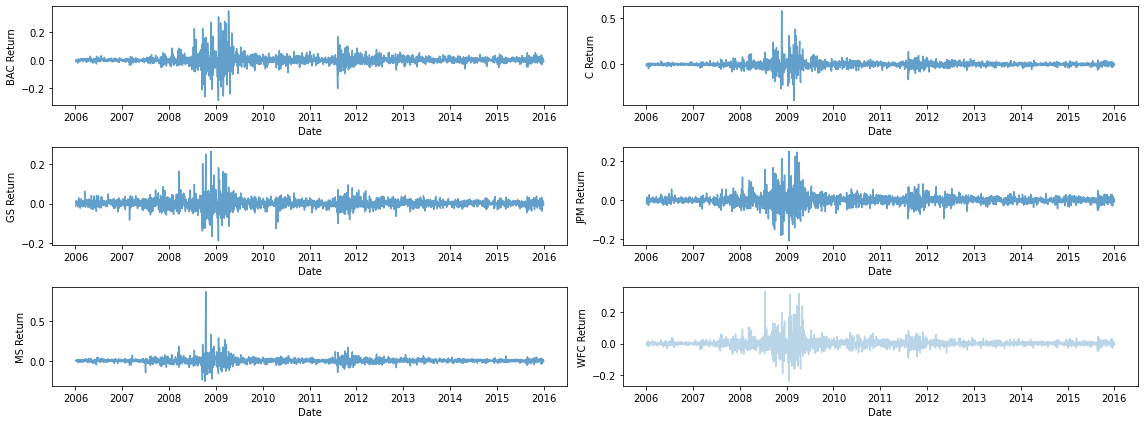

In [16]:
plt.figure(figsize=(16,6))

plt.subplot(321)
sns.lineplot(returns, x='Date', y='BAC Return', alpha=0.70)

plt.subplot(322)
sns.lineplot(returns, x='Date', y='C Return', alpha=0.70)

plt.subplot(323)
sns.lineplot(returns, x='Date', y='GS Return', alpha=0.70)

plt.subplot(324)
sns.lineplot(returns, x='Date', y='JPM Return', alpha=0.70)

plt.subplot(325)
sns.lineplot(returns, x='Date', y='MS Return', alpha=0.70)

plt.subplot(326)
sns.lineplot(returns, x='Date', y='WFC Return', alpha=0.30)

plt.tight_layout()
plt.show()

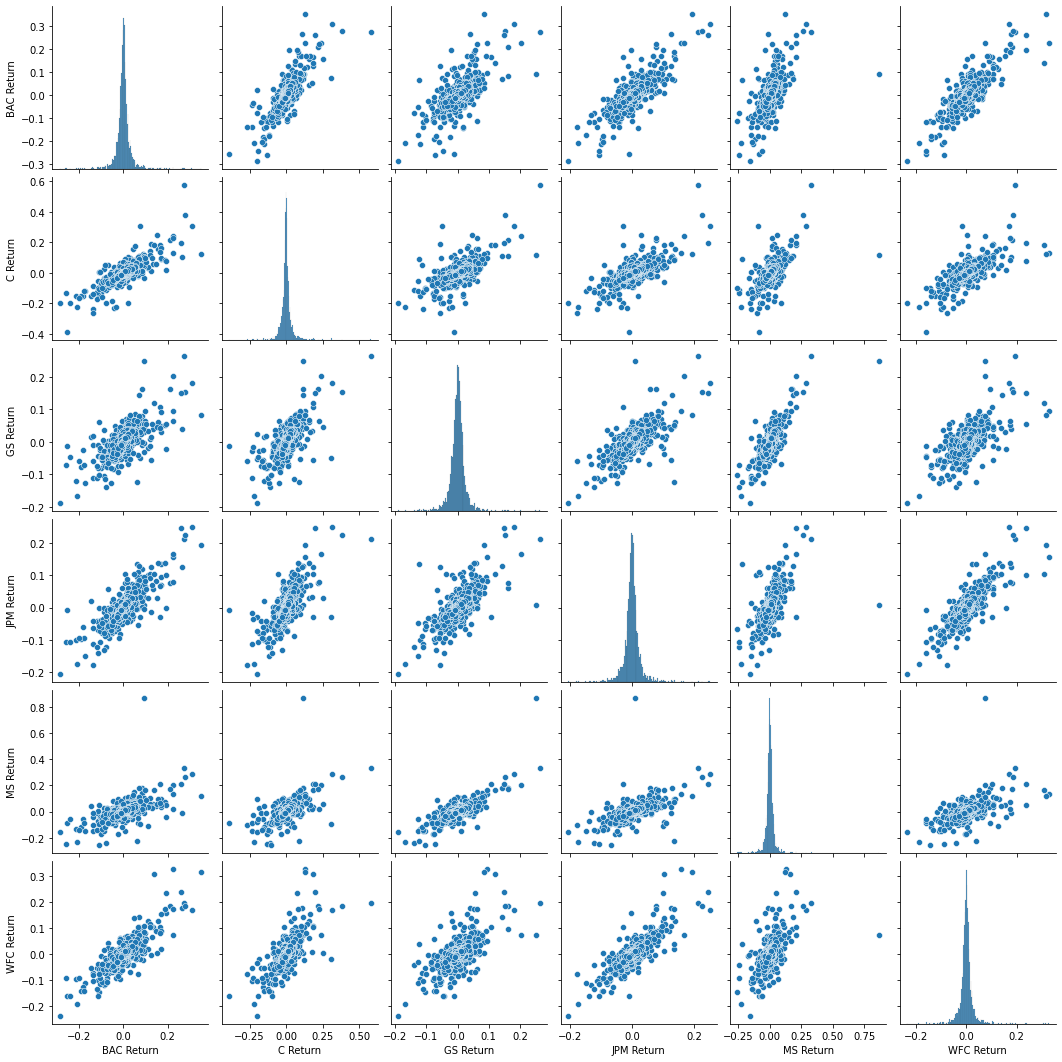

In [17]:
#% of depreciation of MS hit a highest point than the others.

#CITI's recovery looks fast than the others. 
# #Probably, this ocurrs because CITI was early split in two (restructuring of the company when the crisis started).

sns.pairplot(returns[1:])

In [18]:
# *2009-01-20* THE MARKET WAS CONCERNED ABOUT THE CHANGING OF THE 
#US PRESIDENCY THIS DAY

# *2008-10-09* MS TUMBLED 25.9%

# *2009-02-27* CITI DEAL INSPIRES NO CONFIDENCE

returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [25]:
#BIGGER STANDARD DEVIATION FOR MS TOO (RISK/VOLATILITY)

returns.std().sort_values(ascending=False)

C Return      0.038672
MS Return     0.037819
BAC Return    0.036647
WFC Return    0.030238
JPM Return    0.027667
GS Return     0.025390
dtype: float64

In [26]:
#HIGHEST RISK/VOLATILITY IN 2015 (LAST YEAR OF THIS DB)

returns['2015-01-01':'2015-12-31'].std().sort_values(ascending=False)

MS Return     0.016249
BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
WFC Return    0.012591
dtype: float64

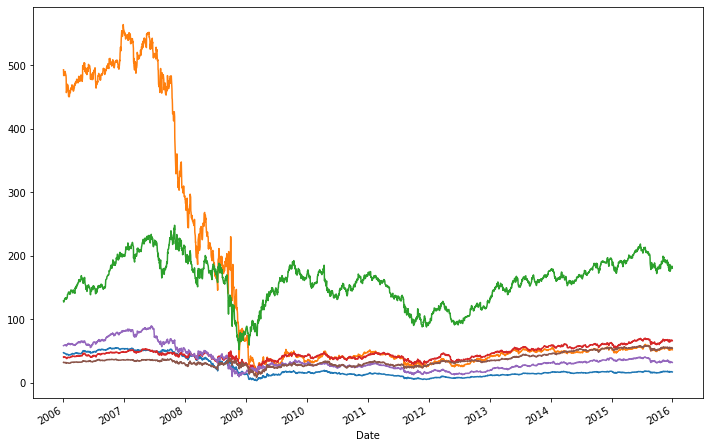

In [27]:
#CLOSING PRICES FOR EACH BANK FOR THE ENTIRE PERIOD

for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick,figsize=(12,8))

<AxesSubplot:xlabel='Date'>

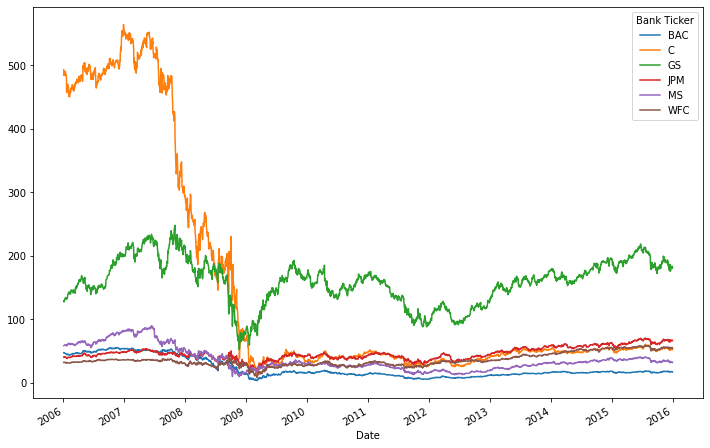

In [20]:
#CLOSING PRICES FOR EACH BANK FOR THE ENTIRE PERIOD ALTERNATIVE (CROSS SECTION.xs)

bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot(label=tick,figsize=(12,8))

In [28]:
#INTERACTIVITY WITH .iplot() PLOTLY

cf.go_offline() #NECESSARY TO RUN IN JUPYTER

#IF NECESSARY INCREASE THE MEMORY OF USED BY JUPYTER: jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000 

#GS RECOVERY WAS DUE, IN PART, OF THE PURCHASE OF $5 BILLION IN SHARES BY WARREN BUFFET, THE CHANGE TO A HOLDING BANK 
#AND THE BAILOUT FROM US GOVERMENT 

bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

#PLAY AROUND

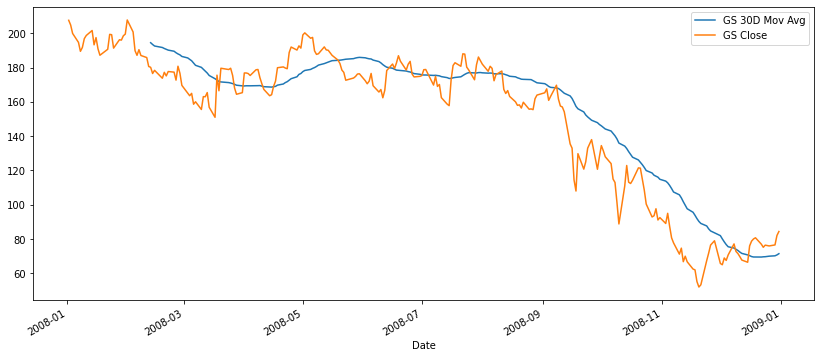

In [29]:
#MOVING AVARAGES VS. STOCK PRICES
GS['Close']['2008-01-01':'2008-12-31'].rolling(window=30).mean().plot(label='GS 30D Mov Avg',figsize=(12,8))
GS['Close']['2008-01-01':'2008-12-31'].plot(label='GS Close',figsize=(14,6))
plt.legend()

<AxesSubplot: xlabel='Bank Ticker', ylabel='Bank Ticker'>

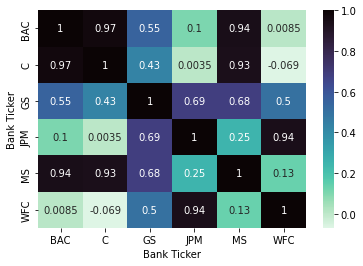

In [30]:
#CORRELATION BETWEEN THIS STOCKS CLOSING PRICES
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True,cmap='mako_r') #ADD _r TO REVERSE COLOR PALLETTE

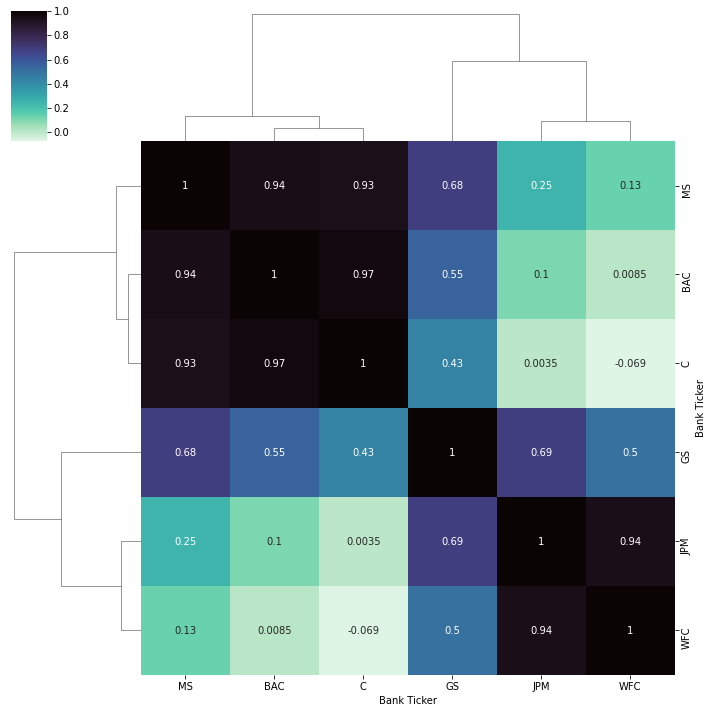

In [31]:
#TO SEE MORE CLEAR
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True,cmap='mako_r')

In [32]:
#CANDLE PLOT
gs_candle = GS[['Open','High','Low','Close']]['2015-01-01':'2015-03-31']
gs_candle.iplot(kind='candle')

In [33]:
#SIMPLE MOV AVG WITH PLOTLY
gs_sma = GS['Close']['2015-01-01':'2015-03-31'].ta_plot(study='sma',periods=[14,28,60])

In [34]:
#technical analysis
gs_sma = GS['Close']['2015-01-01':'2015-03-31'].ta_plot(study='boll')